# Chapter 2: Khai thác Decision Tree để xác định nguyên tắc tín dụng

## 2.1 Vấn đề cần giải quyết

Thiết lập mô hình ước lượng xác suất khách hàng trả nợ đúng cam kết và rút trích nguyên tắc đưa ra tín dụng nhanh

## 2.2 Giải thuật Decision tree


### Shannon entropy

Với phân phối xác suất $P = (p_1, p_2, p_3,..., p_n)$, và mẫu $S$ thì, **Thông tin/Information được thể hiện bởi sự phân phối** được gọi là entropy of P: 

$Entropy(P) = -\sum_{i=1}^{n} p(x_i) \log_2 p(x_i)$

### The gain information

$G(p,T) = Entropy(p) - \sum_{j=1}^{n} \frac{|T_j|}{|T|} Entropy(T_j)$

Where:

- $G(p,T)$ is the information gain for splitting the dataset $T$ on attribute $p$
- $Entropy(p)$ is the entropy of the entire dataset $T$
- $T_j$ is the $j$-th subset of $T$ after splitting on attribute $p$
- $|T_j|$ is the size of subset $T_j$
- $|T|$ is the total size of the dataset $T$
- $Entropy(T_j)$ is the entropy of subset $T_j$

### Thuật toán ID3 (Iterative Dichotomiser 3)

Pseudo code written by Claude 3.5 Sonnet ✍

```python
Algorithm ID3(Examples, Target_Attribute, Attributes):
    # Create a root node for the tree
    root = new Node()
    
    # If all examples have the same value of the target attribute,
    # return a leaf node with that value
    if all examples have same Target_Attribute value t:
        return a leaf node with value t
    
    # If Attributes is empty,
    # return a leaf node with most common Target_Attribute value
    if Attributes is empty:
        return a leaf node with most common Target_Attribute value in Examples
    
    # Otherwise:
    # A = The attribute from Attributes that best classifies Examples
    A = attribute with highest Information_Gain(Examples, a) among Attributes
    
    # Set root node's decision attribute as A
    root.decision_attribute = A
    
    # For each possible value v of A:
    for each possible value v of A:
        # Add a branch below root for A = v
        Add a new branch below root for A = v
        
        # Let Examples_v be the subset of Examples with A = v
        Examples_v = {e ∈ Examples | e.A = v}
        
        if Examples_v is empty:
            below this branch add a leaf node with most common Target_Attribute value in Examples
        else:
            below this branch add subtree:
            ID3(Examples_v, Target_Attribute, Attributes - {A})
    
    return root

Function Information_Gain(Examples, Attribute):
    # Calculate entropy of the entire dataset
    H(Examples) = -∑(p(x) * log2(p(x))) for x in Target_Attribute values
    
    # Calculate conditional entropy
    H(Examples|Attribute) = ∑(p(v) * H(Examples_v)) for each value v of Attribute
    where Examples_v is subset of Examples with Attribute = v
    
    # Return information gain
    return H(Examples) - H(Examples|Attribute)

Function Entropy(Examples):
    # Calculate entropy for a set of examples (✍ or natural logarithm)
    return -∑(p(x) * log2(p(x))) for x in unique Target_Attribute values in Examples
    where p(x) is the proportion of Examples with Target_Attribute = x
```

### Thuật toán C4.5


The Gain Ratio function is defined as:

$Gain_{Ratio}(p, T) = \frac{Gain(p, T)}{Intrinsic_{Info}(T)}$

Where:

- $Gain(p, T)$ is the information gain of splitting the dataset $p$ on attribute $T$
- $Intrinsic_{Info}(T)$ is the intrinsic information of attribute $T$, which measures the information needed to specify the attribute.

```python
Algorithm C4.5(Examples, Target_Attribute, Attributes):
    # Create a root node for the tree
    root = new Node()
    
    # If all examples have the same value of the target attribute,
    # return a leaf node with that value
    if all examples have same Target_Attribute value t:
        return a leaf node with value t
    
    # If Attributes is empty,
    # return a leaf node with most common Target_Attribute value
    if Attributes is empty:
        return a leaf node with most common Target_Attribute value in Examples
    
    # Otherwise:
    # A = The attribute from Attributes that best classifies Examples
    A = attribute with highest Gain_Ratio(Examples, a) among Attributes
    
    # Set root node's decision attribute as A
    root.decision_attribute = A
    
    # For each possible value v of A:
    for each possible value v of A:
        # Add a branch below root for A = v
        Add a new branch below root for A = v
        
        # Let Examples_v be the subset of Examples with A = v
        Examples_v = {e ∈ Examples | e.A = v}
        
        if Examples_v is empty:
            below this branch add a leaf node with most common Target_Attribute value in Examples
        else:
            below this branch add subtree:
            C4.5(Examples_v, Target_Attribute, Attributes - {A})
    
    return root

Function Gain_Ratio(Examples, Attribute):
    # Calculate information gain
    info_gain = Information_Gain(Examples, Attribute)
    
    # Calculate intrinsic information
    intrinsic_info = -∑(|Examples_v| / |Examples| * log2(|Examples_v| / |Examples|)) 
                     for each value v of Attribute
    
    # Return gain ratio
    return info_gain / intrinsic_info

Function Information_Gain(Examples, Attribute):
    # Calculate entropy of the entire dataset
    H(Examples) = -∑(p(x) * log2(p(x))) for x in Target_Attribute values
    
    # Calculate conditional entropy
    H(Examples|Attribute) = ∑(p(v) * H(Examples_v)) for each value v of Attribute
    where Examples_v is subset of Examples with Attribute = v
    
    # Return information gain
    return H(Examples) - H(Examples|Attribute)

Function Entropy(Examples):
    # Calculate entropy for a set of examples
    return -∑(p(x) * log2(p(x))) for x in unique Target_Attribute values in Examples
    where p(x) is the proportion of Examples with Target_Attribute = x
```

### So sánh các thuật toán DT

ID3 (Iterative Dichotomiser 3):
- Uses information gain as the attribute selection metric
- Can only handle discrete attributes
- Does not handle missing values
- No pruning mechanism

C4.5:
- Uses gain ratio as the attribute selection metric
- Can handle both discrete and continuous attributes
- Has a mechanism to handle missing values
- Includes post-pruning to avoid overfitting

C5.0 (Successor to C4.5):
- Improved version of C4.5
- Faster and more memory-efficient
- Supports boosting to create an ensemble of decision trees
- Includes additional features like winnowing (feature selection) and variable misclassification costs

CART (Classification and Regression Trees):
- Uses Gini impurity as the attribute selection metric
- Can handle both classification and regression problems
- Can automatically handle missing values
- Uses recursive binary splitting to grow the tree
- Produces binary trees (each node has at most two child nodes)
- Includes built-in methods for pruning the tree to avoid overfitting

Key differences:
- Attribute selection metric: ID3 uses information gain, C4.5/C5.0 use gain ratio, CART uses Gini impurity
- Handling of continuous attributes: C4.5/C5.0 and CART can handle both discrete and continuous attributes, while ID3 can only handle discrete
- Missing value handling: C4.5/C5.0 and CART have mechanisms to handle missing values, ID3 does not
- Pruning: C4.5/C5.0 and CART include pruning methods to avoid overfitting, ID3 does not
- Tree structure: CART produces binary trees, while ID3/C4.5/C5.0 can produce multi-way trees
- Ensemble methods: C5.0 supports boosting to create an ensemble of decision trees

In summary, the later algorithms (C4.5, C5.0, CART) generally have more advanced features and capabilities compared to the earlier ID3 algorithm, making them more robust and applicable to a wider range of problems.

## 2.3 Practice - basic EDA & data transformation

### Đọc dữ liệu

In [1]:
# Đọc dữ liệu
import os

import pandas as pd

project_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
data_path = os.path.join(project_dir, "data", "raw", "credit_risk_data.csv")
dataset = pd.read_csv(data_path)

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60081 entries, 0 to 60080
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   makhachhang  60081 non-null  object 
 1   fico         60081 non-null  int64  
 2   xephang      60081 non-null  int64  
 3   thunhap      60081 non-null  int64  
 4   kinhnghiem   60081 non-null  int64  
 5   tsdb         60081 non-null  int64  
 6   xacminh      60081 non-null  int64  
 7   mucdich      60081 non-null  int64  
 8   diaphuong    60081 non-null  object 
 9   sotk         60081 non-null  int64  
 10  tienvay      60081 non-null  float64
 11  laisuat      60081 non-null  float64
 12  khoantragop  60081 non-null  float64
 13  trangthai    60081 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 6.4+ MB


In [3]:
dataset.head(10)

,makhachhang,fico,xephang,thunhap,kinhnghiem,tsdb,xacminh,mucdich,diaphuong,sotk,tienvay,laisuat,khoantragop,trangthai
0,KH000001,729,2,49186,1,2,0,12,MT,9,77505.0,11.21,2545.13,0
1,KH000002,666,3,63671,2,2,0,6,VA,9,57879.0,12.84,1945.71,0
2,KH000003,744,2,38582,2,2,0,4,NY,5,39102.0,11.06,1281.26,0
3,KH000004,832,1,178735,3,0,1,3,NJ,8,286548.0,9.18,9136.17,0
4,KH000005,656,3,81788,0,2,0,12,CT,6,101227.0,12.94,3407.81,0
5,KH000006,656,3,58919,10,2,0,8,NM,1,107876.0,12.94,3631.65,0
6,KH000007,837,1,62476,7,1,0,1,NE,5,146824.0,9.13,4677.85,0
7,KH000008,756,1,29861,3,1,1,7,AK,5,24660.0,9.94,795.01,0
8,KH000009,633,4,32876,5,0,0,10,UT,5,19710.0,14.17,675.27,1
9,KH000010,734,2,116012,10,0,0,3,UT,8,84522.0,11.16,2773.55,0


### Mã hóa dữ liệu - encoding

In [4]:
# transform mucdich & diaphuong
# from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# create new df that replicate original data
df1 = pd.DataFrame({"mucdich": dataset["mucdich"]})
df2 = pd.DataFrame({"diaphuong": dataset["diaphuong"]})

# encoding
le = LabelEncoder()
df1["mucdichec"] = le.fit_transform(dataset["mucdich"])
df2["diaphuongec"] = le.fit_transform(dataset["diaphuong"])

# ghi lại vào tập dữ liệu gốc
dataset["mucdich"] = df1.loc[:, "mucdichec"]
dataset["diaphuong"] = df2.loc[:, "diaphuongec"]

In [5]:
dataset.head(10)

,makhachhang,fico,xephang,thunhap,kinhnghiem,tsdb,xacminh,mucdich,diaphuong,sotk,tienvay,laisuat,khoantragop,trangthai
0,KH000001,729,2,49186,1,2,0,12,25,9,77505.0,11.21,2545.13,0
1,KH000002,666,3,63671,2,2,0,6,44,9,57879.0,12.84,1945.71,0
2,KH000003,744,2,38582,2,2,0,4,33,5,39102.0,11.06,1281.26,0
3,KH000004,832,1,178735,3,0,1,3,30,8,286548.0,9.18,9136.17,0
4,KH000005,656,3,81788,0,2,0,12,6,6,101227.0,12.94,3407.81,0
5,KH000006,656,3,58919,10,2,0,8,31,1,107876.0,12.94,3631.65,0
6,KH000007,837,1,62476,7,1,0,1,28,5,146824.0,9.13,4677.85,0
7,KH000008,756,1,29861,3,1,1,7,0,5,24660.0,9.94,795.01,0
8,KH000009,633,4,32876,5,0,0,10,43,5,19710.0,14.17,675.27,1
9,KH000010,734,2,116012,10,0,0,3,43,8,84522.0,11.16,2773.55,0


### Thống kê mô tả

In [6]:
from IPython.display import display

display(dataset.drop(columns="makhachhang").describe().T)

,count,mean,std,min,25%,50%,75%,max
fico,60081.0,677.718813,96.391189,300.00,612.00,680.00,747.00,850.00
xephang,60081.0,3.028944,1.629796,1.00,2.00,3.00,4.00,6.00
thunhap,60081.0,67999.070771,36309.241315,6429.00,42881.00,60070.00,83911.00,489438.00
kinhnghiem,60081.0,4.997653,3.162037,0.00,2.00,5.00,8.00,10.00
tsdb,60081.0,1.203775,0.981013,0.00,0.00,1.00,2.00,3.00
xacminh,60081.0,0.499076,0.671170,0.00,0.00,0.00,1.00,2.00
mucdich,60081.0,4.923353,3.805394,0.00,1.00,4.00,8.00,12.00
diaphuong,60081.0,24.508280,14.374750,0.00,12.00,25.00,37.00,49.00
sotk,60081.0,5.472129,2.874215,1.00,3.00,5.00,8.00,10.00
tienvay,60081.0,98778.496230,70028.873922,4266.00,50101.00,81034.00,127210.00,1000000.00


In [7]:
# chia nhóm thuộc tính

numerical_features = ["tienvay", "laisuat", "khoantragop", "thunhap", "fico", "sotk"]

categorical_features = [
    "trangthai",
    "xephang",
    "kinhnghiem",
    "tsdb",
    "xacminh",
    "mucdich",
    "diaphuong",
]

In [8]:
display(dataset[numerical_features].describe().T)

,count,mean,std,min,25%,50%,75%,max
tienvay,60081.0,98778.496230,70028.873922,4266.00,50101.00,81034.00,127210.00,1000000.00
laisuat,60081.0,12.751756,2.571891,9.00,11.03,12.70,14.38,19.50
khoantragop,60081.0,3300.546613,2310.011491,152.29,1689.23,2720.32,4254.67,34187.34
thunhap,60081.0,67999.070771,36309.241315,6429.00,42881.00,60070.00,83911.00,489438.00
fico,60081.0,677.718813,96.391189,300.00,612.00,680.00,747.00,850.00
sotk,60081.0,5.472129,2.874215,1.00,3.00,5.00,8.00,10.00


In [9]:
# điều này không xảy ra với bộ dữ liệu fake
dataset = dataset.drop(dataset[dataset["thunhap"] == 0].index)

In [10]:
# thống kê cho các biến phân loại
# list rỗng
tables = []

for feature in categorical_features:
    value_counts = dataset[feature].value_counts()
    percentages = value_counts / dataset[feature].count() * 100
    cum_percentages = percentages.cumsum()
    table = pd.concat([value_counts, percentages, cum_percentages], axis=1)
    table.columns = ["Tần suất", "Tỷ lệ", "Tỷ lệ tích lũy"]
    table = table.sort_values(by="Tần suất")

    tables.append(table)

pd.concat(tables, axis=0, keys=categorical_features)

Tần suất      Tỷ lệ  Tỷ lệ tích lũy
trangthai 1       8807  14.658544      100.000000
          0      51274  85.341456       85.341456
xephang   6       5824   9.693580      100.000000
          5       6985  11.625972       90.306420
          4      10173  16.932142       78.680448
...                ...        ...             ...
diaphuong 12      1254   2.087182       10.584045
          26      1266   2.107155        8.496863
          35      1268   2.110484        6.389707
          25      1276   2.123800        4.279223
          7       1295   2.155424        2.155424

[89 rows x 3 columns]

### Phân chia tập dữ liệu

In [11]:
from sklearn.model_selection import train_test_split

# xác định target và feature
target = ["trangthai"]
features = list(set(list(dataset.columns)) - set(target) - set(["makhachhang"]))

# phân chia train test
X = dataset[features].values
y = dataset[target].values
# tỷ lệ 9 - 1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

### Thiết lập và huấn luyện mô hình với giải thuật DT

Ưu:

- nhận diện được các thuộc tính và phân lớp chúng theo dạng cây -> rất phù hợp trong tín dụng ngân hàng, giúp xây dựng các nguyên tắc;
- nó đưa ra một con số về xác suất PD - một thông tin tham chiếu có giá trị;
- giảm lựa chọn ngược, giảm cả hai sai lầm loại I/II, tăng tính công khai minh bạch;
- dễ hiểu dễ giải thích;
- xử lí tốt thông tin đầu vào phức tạp

Nhược:

- dễ overfitting khi có nhiều thuộc tính;
- dễ học lệch (???) nếu có nhiều outlier, khuyết trống.

In [12]:
# khởi tạo và huấn luyện
from sklearn.tree import DecisionTreeClassifier

DT_classifier1 = DecisionTreeClassifier()
DT_classifier1.fit(X_train, y_train.ravel())
y_prob_train_dt1 = DT_classifier1.predict_proba(X_train)
y_pred_train_dt1 = DT_classifier1.predict(X_train)

In [13]:
# đánh giá kết quả
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix)

print(confusion_matrix(y_train, y_pred_train_dt1))
print(classification_report(y_train, y_pred_train_dt1))
print(
    "Độ chính xác của mô hình Decision Tree chạy lần 1: ",
    accuracy_score(y_train, y_pred_train_dt1),
)

[[46126     0]
 [    0  7946]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     46126
           1       1.00      1.00      1.00      7946

    accuracy                           1.00     54072
   macro avg       1.00      1.00      1.00     54072
weighted avg       1.00      1.00      1.00     54072

Độ chính xác của mô hình Decision Tree chạy lần 1:  1.0


Do chưa được tinh chỉnh, cây DT sẽ phát triển đến khi mỗi nhánh chỉ còn một cây, nên xác suất dự đoán của `y_prob_train_dt1` luôn là cặp 0 - 1.

In [14]:
df_report = pd.DataFrame(
    {
        "Y observed": y_train.ravel(),
        "Y classification": y_pred_train_dt1.ravel(),
        "Y probability": y_prob_train_dt1[:, 1],
    }
)
df_report.head(15)

,Y observed,Y classification,Y probability
0,0,0,0.0
1,0,0,0.0
2,1,1,1.0
3,1,1,1.0
4,1,1,1.0
5,0,0,0.0
6,0,0,0.0
7,0,0,0.0
8,0,0,0.0
9,0,0,0.0


### Tỉa cây với kỹ thuật max depth

In [15]:
from sklearn.tree import DecisionTreeClassifier

DT_classifier2 = DecisionTreeClassifier(max_depth=4)
DT_classifier2.fit(X_train, y_train)

y_prob_train_dt2 = DT_classifier2.predict_proba(X_train)
y_pred_train_dt2 = DT_classifier2.predict(X_train)

df_report = pd.DataFrame(
    {
        "Y observed": y_train.ravel(),
        "Y classification": y_pred_train_dt2.ravel(),
        "Y probability": y_prob_train_dt2[:, 1],
    }
)
df_report.head(15)

,Y observed,Y classification,Y probability
0,0,0,0.128991
1,0,0,0.196149
2,1,0,0.072031
3,1,0,0.226157
4,1,0,0.087793
5,0,0,0.134586
6,0,0,0.085387
7,0,0,0.196149
8,0,0,0.087793
9,0,0,0.183454


### Gọi các nhánh chính của cây quyết định min sample leaf

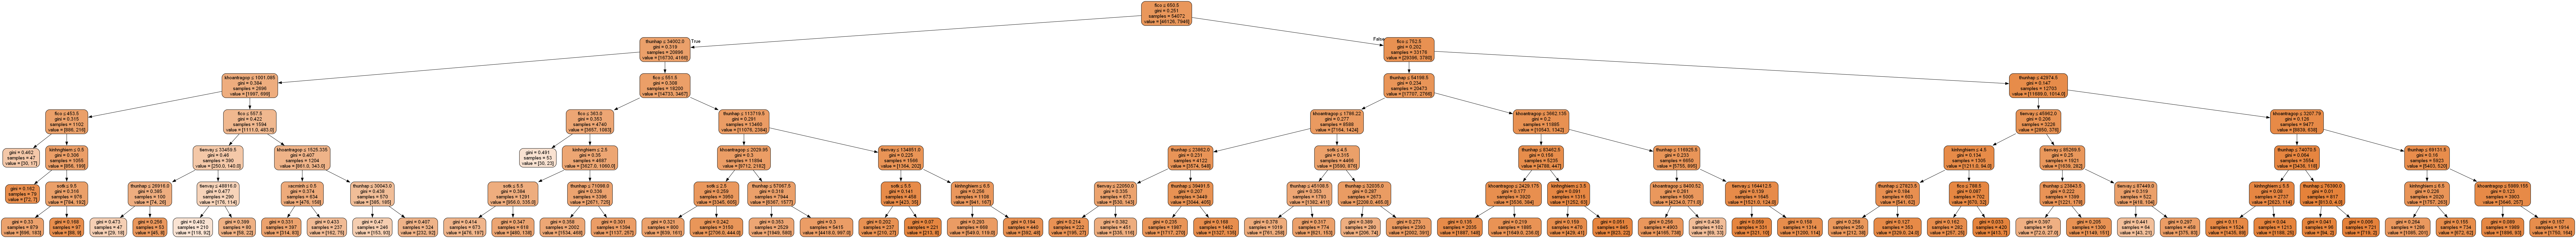

In [16]:
import os

import graphviz
from IPython.display import Image
from sklearn.tree import export_graphviz

# Assuming the Graphviz bin directory path is 'C:/Program Files (x86)/Graphviz2.xx/bin'
os.environ["PATH"] += (
    os.pathsep + "C:/Program Files (x86)/Graphviz/bin"
)  # add with the code, Gemini instructed me this 😪

from sklearn.tree import DecisionTreeClassifier

DT_classifier3 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=47)
DT_classifier3.fit(X_train, y_train)

y_prob_train_dt3 = DT_classifier3.predict_proba(X_train)
y_pred_train_dt3 = DT_classifier3.predict(X_train)

dot_data = export_graphviz(
    DT_classifier3,
    out_file=None,
    feature_names=features,
    filled=True,
    rounded=True,
    special_characters=True,
)

graph = graphviz.Source(dot_data)
graph.format = "png"

graph.render("./output/chapter2_decision_tree3")
Image(filename="./output/chapter2_decision_tree3.png")

### Kiểm tra lại hiệu quả mô hình trên tập kiểm tra

In [17]:
import warnings

from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix)
from sklearn.tree import DecisionTreeClassifier

warnings.simplefilter("ignore")
# Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

DT_classifier4 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=47)
DT_classifier4.fit(X_train, y_train)

y_prob_test_dt4 = DT_classifier4.predict_proba(X_test)
y_pred_test_dt4 = DT_classifier4.predict(X_test)


print(confusion_matrix(y_test, y_pred_test_dt4))
print(classification_report(y_test, y_pred_test_dt4))
print(
    "Độ chính xác của mô hình DT khi chạy lần 4",
    accuracy_score(y_test, y_pred_test_dt4),
)

[[5148    0]
 [ 861    0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      5148
           1       0.00      0.00      0.00       861

    accuracy                           0.86      6009
   macro avg       0.43      0.50      0.46      6009
weighted avg       0.73      0.86      0.79      6009

Độ chính xác của mô hình DT khi chạy lần 4 0.8567149276085871


### Lưu kết quả mô hình

```python
# đặt trước khi huấn luyện và dự báo để chạy lại kết quả đã lưu
import pickle

with open("DT_classifier.pkl", 'rb') as f:
    DT_classifier4 = pickle.load(f)

# đặt sau khi huấn luyện và dự đoán để lưu kết quả mô hình
import pickle

with open("DT_classifier.pkl", 'wb') as f:
    pickle.dump(DT_classifier4, f)
```

## 2.4 Bài học kinh nghiệm

1. DT là nghệ thuật tùy chỉnh:
+ Rất nhạy với các thay đổi ở train data:
  - Tránh được bằng cách cố định tập huấn luyện;
  - Chọn trước các thuộc tính lõi để huấn luyện;
+ Nhạy cảm và dễ học lệch với imbalance dataset;
+ Hạn chế khi có quá nhiều thuộc tính, cây sẽ "ghi nhớ" thay vì "học tập", có thể hạn chế bằng cắt tỉa;
+ Việc cắt tỉa còn giúp rút trích các nguyên tắc;
+ Có thể xử lí với biến có nhiều lớp định danh tuy nhiên cây không nhận diện được **ý nghĩa kinh tế**, nên có thể xử lí kém hiệu quả, giải pháp:
    - Mã hóa nhị phân cho biến đa lớp;
    - One-hot encoding;
2. Là nền tảng để khám phá các thuật toán hệ cây khác;
3. Những lỗi thường gặp cần lưu ý:
+ cùng một cách EDA cho hai loại biến: giá trị và định danh;
+ xử lí luôn biến định danh không qua mã hóa nhị phân;
+ xử lí trên tập dữ liệu ngẫu nhiên qua mỗi đợt huấn luyện;
4. Những khó khăn khi vận dụng vào thực tiễn:
+ Imbalance data, low-risk portfolio, kiểu như khó khăn khi reject inference;
+ Thiếu dữ liệu, thiếu tính cập nhật dữ liệu.